<Figure size 1000x600 with 0 Axes>

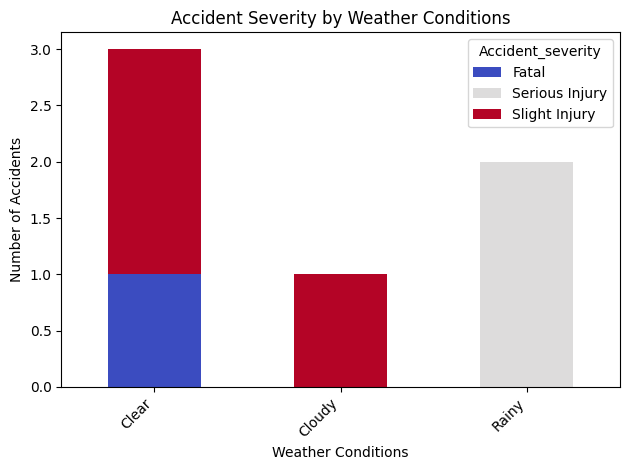

<Figure size 1000x600 with 0 Axes>

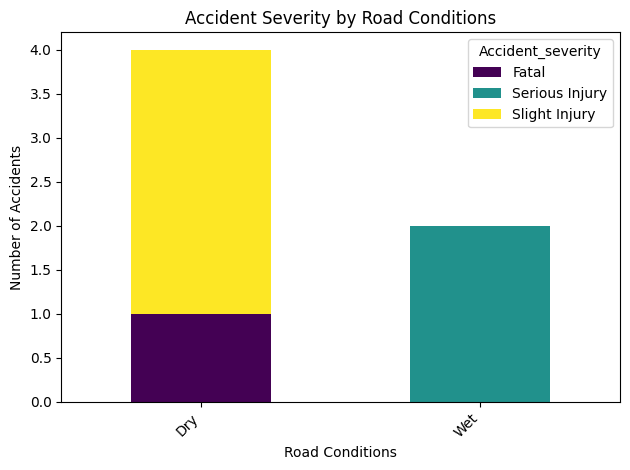

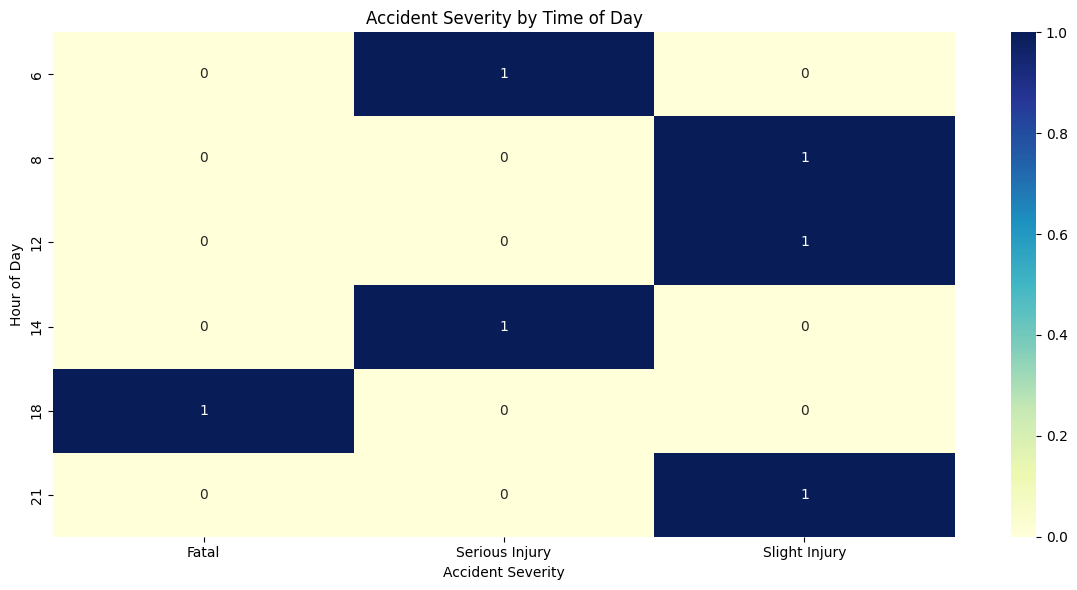

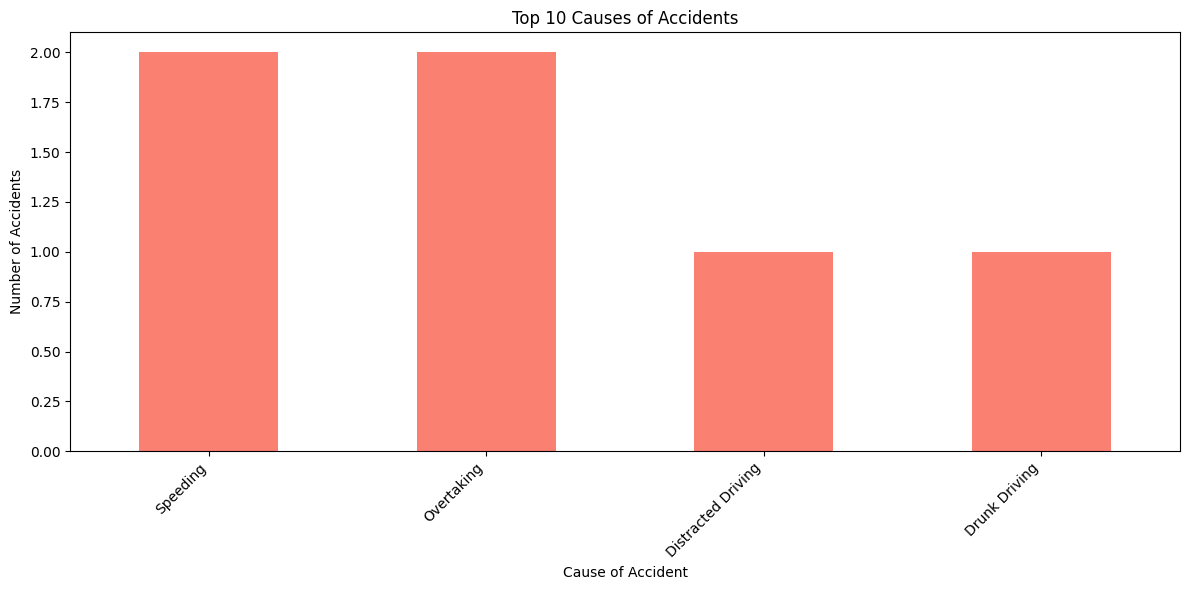

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Make sure you have your dataset file path here
data = pd.read_csv('/content/sample_traffic_accidents.csv')

# Convert 'Time' to datetime and extract the hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['Hour'] = data['Time'].dt.hour

# Cleaning data: Drop rows with missing values in relevant columns
clean_data = data.dropna(subset=['Weather_conditions', 'Road_conditions', 'Accident_severity'])

# Grouping data by weather conditions, road conditions, and time of day (hour)
severity_by_weather = clean_data.groupby(['Weather_conditions', 'Accident_severity']).size().unstack(fill_value=0)
severity_by_road = clean_data.groupby(['Road_conditions', 'Accident_severity']).size().unstack(fill_value=0)
severity_by_hour = clean_data.groupby(['Hour', 'Accident_severity']).size().unstack(fill_value=0)

# Plotting accident patterns by weather conditions
plt.figure(figsize=(10, 6))
severity_by_weather.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting accident patterns by road conditions
plt.figure(figsize=(10, 6))
severity_by_road.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Accident Severity by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Heatmap for accident severity by time of day
plt.figure(figsize=(12, 6))
sns.heatmap(severity_by_hour, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Accident Severity by Time of Day')
plt.xlabel('Accident Severity')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

# Analyze contributing factors (cause of accidents)
cause_of_accidents = clean_data['Cause_of_accident'].value_counts().nlargest(10)

# Bar plot for top 10 causes of accidents
plt.figure(figsize=(12, 6))
cause_of_accidents.plot(kind='bar', color='salmon')
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
